# <a name="top">WeRateDogs - Udacity Data Wrangling Project 03 </a>
---
## GATHER & ASSESS 3 datasets from 3 different sources:
1. [Gather/Assess Data #1](#gatherassess1) - Twitter archive, twitter-archive-enhanced.csv (local archive). format: CSV
2. [Gather/Assess Data #2](#gatherassess2) - Tweet image predictions - Download data from file_url utilizing requests library. format: TSV
3. [Gather/Assess Data #3](#gatherassess3) - Query Twitter API for additional data - image_preds (local archive created from image recognition system). format: TXT
 
## CLEAN (8) Quality Issues 
Also known as dirty data which includes mislabeled, corrupted, duplicated, inconsistent content issues, etc.

### twitter-archive-enhanced.csv quality issues:

1. [Quality #1](#q1) - columns 'timestamp' & 'retweeted_status_timestamp' are objects (strings) and not of 'timestamp' type. Change type to timestamp

2. [Quality #2](#q2) - twitterDF.name contains a lot of non-dog names, e.g. 'a', 'an', 'actually', etc; Replace with np.NaN
   
3. [Quality #3](#q3) - ratings with decimal values in the numerator incorrectly extracted (not including denominator)

4. [Quality #4](#q4) - remove URL from 'source' & replace with 4 categories: iphone, vine, twitter, tweetdeck

5. [Quality #5](#q5) - retweeted_status_id is of type float; change to object(text); `in_reply_to_status_id` and `in_reply_to_user_id` are type float; Convert to string
 
6. [Quality #6](#q6) - 

### rt_tweets quality issues:

7. [Quality #7](#q7) - create new dataframe of columns needed (or remove columns not needed)

8. [Quality #8](#q8) - remove retweets


---
## CLEAN (2) Tidiness Issues
Messy data includes structural issues where variables don't form a column, observations form rows, & each observational unit forms a table.

1. [Tidy #1](#t1) - Dog stages need to be combined into one column

2. [Tidy #2](#t2) - Merge all three datasets to form one. Three similar datasets should form one observation unit.
---
## Insights from Data Analysis:

1. [BAR CHART 1](#vis1) - Horizontal Bar Chart (WeRateDogs Dog Breeds represented (top 10))
2. [BAR CHART 2](#vis2) - Horizontal Bar Chart (Top 15 Favorites (tweets), by probable name)
3. [Programatic 1](#prog1) - First predicted name with the mean of specific data points
4. [Programatic 2](#prog2) - Grouping of dataframe on the first predicted name for various mean data
---

## Saved new dataframe to file 
[Save to file, WeRateDogs_migration.csv](#save1) to file.


[BACK TO TOP](#top)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import requests

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
%matplotlib inline

## <a name="gatherassess1">Gather/Assess Data #1 - Twitter Archive Enhanced</a>

In [2]:
# Read data into dataframe
twitterDF_orig = pd.read_csv("data/twitter-archive-enhanced.csv")

# Make copy of dataframe
twitterDF = twitterDF_orig.copy()

In [3]:
# Visually Assess Twitter Archive
twitterDF.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
328,833722901757046785,NaN,NaN,2017-02-20 17:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bronte. She's fairly h*ckin aerodynami...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833722901...,13,10,Bronte,None,None,None,None
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
2043,671536543010570240,NaN,NaN,2015-12-01 03:49:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reginald. He's pondering what life wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671536543...,9,10,Reginald,None,None,None,None
1871,675147105808306176,NaN,NaN,2015-12-11 02:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're presenting a group project and the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675147105...,10,10,None,None,None,None,None
1716,680206703334408192,NaN,NaN,2015-12-25 02:01:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680206703...,12,10,Toby,None,None,None,None
2022,672068090318987265,NaN,NaN,2015-12-02 15:01:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's upset because he's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672068090...,7,10,Gizmo,None,None,None,None
1593,686386521809772549,NaN,NaN,2016-01-11 03:17:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Crimson. He's a Speckled Winnebag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686386521...,11,10,Crimson,None,None,None,None
276,840632337062862849,NaN,NaN,2017-03-11 18:35:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maddie and Gunner. They are consi...,NaN,NaN,NaN,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None
760,778383385161035776,NaN,NaN,2016-09-21 00:00:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778383385...,13,10,Nala,None,None,None,None


In [4]:
# Programmatically Assess
# review data columns in DF, are Dtypes appropriate, etc.
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
# Programmatically Assess
# find all tweets where the retweeted_status_id is notnull
twitterDF[twitterDF.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


[BACK TO TOP](#top)

In [6]:
# Programmitically Assess
# review names of pups
# twitterDF.name.value_counts(): using this was harder to see the invalid names
twitterDF[twitterDF.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
mad              2
getting          2
not              2
actually         2
infuriating      1
old              1
by               1
such             1
unacceptable     1
my               1
his              1
this             1
officially       1
life             1
incredibly       1
light            1
all              1
space            1
Name: name, dtype: int64

In [7]:
# Programmatically Assess
# review dogtionary names; interesting to see id# 200 has 2 values, doggo & floofer
twitterDF[twitterDF['floofer'] != 'None'].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None


In [8]:
# it appears the stages are pulled from the tweeted text, 'doggo' & 'floofer' in text below

twitterDF.loc[200,'text']

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [9]:
# Illustrating that pup designations are NOT singular. Multiple 
twitterDF[twitterDF['doggo'] != 'None'].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
977,750011400160841729,NaN,NaN,2016-07-04 17:00:26 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,doggo,None,None,None
1075,739623569819336705,NaN,NaN,2016-06-06 01:02:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo that don't need no human. 12/10...,NaN,NaN,NaN,https://vine.co/v/iY9Fr1I31U6,12,10,None,doggo,None,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None


In [94]:
# Much better way to illustrate multiple stages designated to some pups
twitterDF[(twitterDF[['doggo','floofer','pupper','puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02+00:00,iphone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10.0,NaN,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,iphone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10.0,NaN,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28+00:00,iphone,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28+00:00,iphone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,NaN,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47+00:00,iphone,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11.0,10.0,NaN,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25+00:00,iphone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48+00:00,iphone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20+00:00,vine,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12.0,10.0,NaN,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42+00:00,iphone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10.0,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47+00:00,iphone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,NaN,doggo,None,pupper,None


## <a name="gather2">Gather Data #2 - Tweet image predictions</a>

In [10]:
# Download data from file_url utilizing requests library & save to line #5
file_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
req = requests.get(file_url)
fname = os.path.basename(file_url)
open("data/" + fname, 'wb').write(req.content)

335079

In [11]:
# Nows read file downloaded & view sample to ensure read_csv worked. Also works as a visual assessment.
image_preds_orig = pd.read_csv("data/image-predictions.tsv", sep="\t")
image_preds = image_preds_orig.copy()

# visual assessment
image_preds.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,2.937440e-01,True,Labrador_retriever,2.706730e-01,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,2.277160e-01,True,soft-coated_wheaten_terrier,2.232630e-01,True
1883,847251039262605312,https://pbs.twimg.com/media/C8IKUjAUwAEP-En.jpg,1,Airedale,0.495380,True,Irish_terrier,3.164560e-01,True,Lakeland_terrier,1.585330e-01,True
1332,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,seat_belt,0.425176,False,Labrador_retriever,1.281280e-01,True,Siamese_cat,9.124110e-02,False


In [12]:
# programmatic assessment
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## <a name="gather3">Gather Data #3 - Query Twitter API for additional data</a>
Query Twitter's API for JSON data for each tweet ID in the Twitter archive

 * retweet count
 * favorite count
 * any additional data found that's interesting
 * only tweets on Aug 1st, 2017 (image predictions present)

In [13]:
# define keys & API info 
# authenticate API using regenerated keys/tokens

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [14]:
tweet_ids = twitterDF.tweet_id.values
len(tweet_ids)

2356

In [15]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
'''
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

### Start from here if data already obtained from Twitter                                                   

[BACK TO TOP](#top)

In [16]:
# Read tweet JSON into dataframe using pandas
# recived ValueError: Trailing data without 'lines=True'

rt_tweets_orig = pd.read_json("tweet.json", lines=True)
rt_tweets = rt_tweets_orig.copy()

# visual assessment as well as confirmation that read_json successful
rt_tweets.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [17]:
# programmatic assessment
rt_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   id                             2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   full_text                      2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   display_text_range             2330 non-null   object             
 6   entities                       2330 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2330 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [18]:
# programmatic assessment
# View retweeted tweets, first 5 of 163, these will be deleted

rt_tweets[rt_tweets.retweeted_status.notnull()].head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
35,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN,NaN
72,2017-06-24 00:09:53+00:00,878404777348136964,878404777348136960,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN,NaN
73,2017-06-23 18:17:33+00:00,878316110768087041,878316110768087040,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN,NaN


In [19]:
# visual assessment
rt_tweets.user

0       {'id': 4196983835, 'id_str': '4196983835', 'na...
1       {'id': 4196983835, 'id_str': '4196983835', 'na...
2       {'id': 4196983835, 'id_str': '4196983835', 'na...
3       {'id': 4196983835, 'id_str': '4196983835', 'na...
4       {'id': 4196983835, 'id_str': '4196983835', 'na...
                              ...                        
2325    {'id': 4196983835, 'id_str': '4196983835', 'na...
2326    {'id': 4196983835, 'id_str': '4196983835', 'na...
2327    {'id': 4196983835, 'id_str': '4196983835', 'na...
2328    {'id': 4196983835, 'id_str': '4196983835', 'na...
2329    {'id': 4196983835, 'id_str': '4196983835', 'na...
Name: user, Length: 2330, dtype: object

In [20]:
# visual assessment
rt_tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [21]:
# visual assessment
# inspect the extended entities data
rt_tweets.loc[0,'extended_entities']

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [22]:
# visual assessment
# inspect the entities data
rt_tweets.loc[115,'entities']

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 869702951354474496,
   'id_str': '869702951354474496',
   'indices': [140, 163],
   'media_url': 'http://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg',
   'url': 'https://t.co/vmCu3PFCQq',
   'display_url': 'pic.twitter.com/vmCu3PFCQq',
   'expanded_url': 'https://twitter.com/dog_rates/status/869702957897576449/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 901, 'h': 1600, 'resize': 'fit'},
    'small': {'w': 383, 'h': 680, 'resize': 'fit'},
    'medium': {'w': 676, 'h': 1200, 'resize': 'fit'}}}]}

In [23]:
# visual assessment
rt_tweets.loc[130,'user']

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': 'merch ➜',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/N7sNNHSfPq',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8894598,
 'friends_count': 18,
 'listed_count': 6035,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145946,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 13082,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/them

In [24]:
# visual assessment
rt_tweets.iloc[1:8,11:]

,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,5549,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3671,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7649,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8249,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,2759,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1791,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,16725,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


---
<a name="q1">-</a>
### Define

### Q1 - Convert dtype of timestamp columns

### Code

In [25]:
# Fixed 2 columns with incorrect datatypes, changed to datetime64
twitterDF.timestamp = pd.to_datetime(twitterDF.timestamp)
twitterDF.retweeted_status_timestamp = pd.to_datetime(twitterDF.retweeted_status_timestamp)

### Test

In [26]:
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

---
<a name="q2">-</a>
### Define

### Q2 - twitterDF.name contains a lot of non-dog names, e.g. 'a', 'an', 'actually', etc; Replace with np.NaN

### Code

In [27]:
# apparantely all of the invalid dog names are lowercase. See here.
# It's interesting to see the difference between this filter & the one below it
# Either way 'None' must be added manually

twitterDF[twitterDF.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
mad              2
getting          2
not              2
actually         2
infuriating      1
old              1
by               1
such             1
unacceptable     1
my               1
his              1
this             1
officially       1
life             1
incredibly       1
light            1
all              1
space            1
Name: name, dtype: int64

In [28]:
# Alternate way to obtain all lowercase names using regex
# Had this been a thorough cleaning, further investigation would be required to understand
# the difference between these 2 filters
# Either way 'None' must be added manually

mask = twitterDF.name.str.contains('^[a-z]', regex = True)
twitterDF[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [29]:
# Create name list from regex mask
# Manually add 'None' to list

name_mask = list(set(twitterDF[mask].name.values))
name_mask.append('None')
name_mask

['such',
 'unacceptable',
 'my',
 'getting',
 'the',
 'incredibly',
 'light',
 'a',
 'officially',
 'quite',
 'his',
 'this',
 'life',
 'old',
 'by',
 'very',
 'all',
 'one',
 'infuriating',
 'mad',
 'an',
 'not',
 'actually',
 'just',
 'space',
 'None']

In [30]:
df = twitterDF.copy()

In [31]:
# I'm certain there's a more pythonic way to process a column according to a condition
# This little function checks if the pup's name falls within the name_mask list (all lowercase 'names', e.g. a, an, etc.)
# & returns NaN if TRUE & returns name back if FALSE

def pup_name(name):
    if name in name_mask:
        #print(f"name in mask: {name}")
        return np.NaN
    else:
        #print(f"name NOT in mask: {name}")
        return name        

In [32]:
# apply pup_name() func to every row of dataframe

twitterDF['name'] = twitterDF.apply(lambda row: pup_name(row['name']), axis=1)

### Test

In [33]:
# check to ensure all 'a' names are removed. Arbitrarily select a couple others to test
twitterDF[twitterDF.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
twitterDF[twitterDF.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


---
<a name="q3">-</a>
### Define 
### Q3 - Ratings with decimal values incorrectly extracted 

### Code

In [35]:
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [36]:
# update Dtype of ratings to float to accept the updated values

twitterDF.rating_numerator = twitterDF.rating_numerator.astype(float)
twitterDF.rating_denominator = twitterDF.rating_denominator.astype(float)
twitterDF.info()
twitterDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2159,669571471778410496,NaN,NaN,2015-11-25 17:40:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's had 13 DUIs. 7/10 that's t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669571471...,7.0,10.0,Keith,None,None,None,None
208,852311364735569921,NaN,NaN,2017-04-13 00:03:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wiggles. She would like you to spot he...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/852311364...,13.0,10.0,Wiggles,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/847962785...,10.0,10.0,Georgie,None,None,None,None


In [37]:
# extract ratings from text to include decimal values for the NUMERATOR only & SEE result

ratings = twitterDF.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings.sample(5)

,0,1
2253,8,10
149,14,10
1561,12,10
862,11,10
1424,11,10


In [38]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2356 non-null   object
 1   1       2356 non-null   object
dtypes: object(2)
memory usage: 36.9+ KB


In [39]:
# rename column names
# change num & denom to type float (to accomodate the decimal values)

ratings = ratings.rename(columns={0:'numerator',1:'denominator'})
ratings.numerator = ratings.numerator.astype(float)
ratings.denominator = ratings.denominator.astype(float)

ratings.info

<bound method DataFrame.info of       numerator  denominator
0          13.0         10.0
1          13.0         10.0
2          12.0         10.0
3          13.0         10.0
4          12.0         10.0
...         ...          ...
2351        5.0         10.0
2352        6.0         10.0
2353        9.0         10.0
2354        7.0         10.0
2355        8.0         10.0

[2356 rows x 2 columns]>

In [40]:
# replace dataframe numerator & denominator with updated regex version

twitterDF.rating_numerator = ratings.numerator
twitterDF.rating_denominator = ratings.denominator
twitterDF.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a frustrated pupper attempting to escap...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/755955933...,12.0,10.0,NaN,None,None,pupper,None
1944,673708611235921920,NaN,NaN,2015-12-07 03:40:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. She's just an adorable football...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/673708611...,12.0,10.0,Riley,None,None,None,None


### Test

In [41]:
twitterDF.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1123,730427201120833536,NaN,NaN,2016-05-11 15:59:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's flawless. Really wants ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/730427201...,11.0,10.0,Crystal,None,None,None,None
850,765719909049503744,NaN,NaN,2016-08-17 01:20:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Brat. He has a hard time being ferocio...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/765719909...,12.0,10.0,Brat,None,None,None,None
921,756288534030475264,NaN,NaN,2016-07-22 00:43:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a heartwarming scene of a single father...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/756288534...,12.0,10.0,NaN,None,None,None,None
1582,687109925361856513,NaN,NaN,2016-01-13 03:12:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He looks like a fun dog. Prefe...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/687109925...,11.0,10.0,Baxter,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49+00:00,https://twitter.com/dog_rates/status/681694085...,11.0,10.0,Bo,None,None,pupper,None
2160,669567591774625800,NaN,NaN,2015-11-25 17:25:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kollin. He's a Parakeetian Badminton from...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669567591...,9.0,10.0,Kollin,None,None,None,None
1357,703407252292673536,NaN,NaN,2016-02-27 02:32:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doesn't understand gates. 10/10 so...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/703407252...,10.0,10.0,NaN,None,None,pupper,None
1032,745314880350101504,NaN,NaN,2016-06-21 17:58:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sugar. She excels underwater. 12/10 ph...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/745314880...,12.0,10.0,Sugar,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09+00:00,https://twitter.com/dog_rates/status/793286476...,13.0,10.0,Moreton,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/777885040...,3.0,10.0,Wesley,None,None,None,None


---
<a name="q4">-</a>
### Define
### Q4 - remove URL from 'source' & replace with 4 categories: iphone, vine, twitter, tweetdeck

In [42]:
# review names of sources
twitterDF.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Code

In [43]:
twitterDF.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None


In [44]:
# function to categorize source column

def update_source(row):
    if 'iphone' in row:
        return 'iphone'
    elif 'vine' in row:
        return 'vine'
    elif 'Twitter' in row:
        return 'twitter web client'
    elif 'TweetDeck' in row:
        return 'TweetDeck'

In [45]:
# run update_source function on every row to replace source text with shorter description of source
twitterDF.source = twitterDF.apply(lambda row: update_source(row['source']),axis=1)

### Test

In [46]:
# check to ensure function replaced items as intended
twitterDF.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1221,714485234495041536,NaN,NaN,2016-03-28 16:12:09+00:00,vine,This is Blitz. He screams. 10/10 (vid by @yeaa...,NaN,NaN,NaT,https://vine.co/v/iDrOvVqq0A6,10.0,10.0,Blitz,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14+00:00,iphone,RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24+00:00,https://twitter.com/dog_rates/status/868880397...,14.0,10.0,Walter,None,None,None,None
803,772152991789019136,NaN,NaN,2016-09-03 19:23:13+00:00,iphone,Here's a couple rufferees making sure all the ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/772152991...,10.0,10.0,NaN,None,None,None,None
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47+00:00,iphone,This is Bella. She had her first beach experie...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/880465832...,12.0,10.0,Bella,None,None,None,None
432,820749716845686786,NaN,NaN,2017-01-15 21:49:15+00:00,iphone,Meet Sunny. He can take down a polar bear in o...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/820749716...,13.0,10.0,Sunny,None,None,None,None


---
<a name="q5">-</a>
### Define
### Q5 - retweeted_status_id is of type float; change to object(text). `in_reply_to_status_id` and `in_reply_to_user_id` are type float. Convert to string

### Code

In [47]:
# data exploration
# see sample of is_reply_to_status_id...
twitterDF[twitterDF.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35+00:00,iphone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaT,NaN,12.0,10.0,NaN,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53+00:00,iphone,@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaT,NaN,17.0,10.0,NaN,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36+00:00,iphone,@RealKentMurphy 14/10 confirmed,NaN,NaN,NaT,NaN,14.0,10.0,NaN,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25+00:00,iphone,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaT,NaN,10.0,10.0,NaN,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35+00:00,iphone,@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaT,NaN,12.0,10.0,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10+00:00,iphone,After 22 minutes of careful deliberation this ...,NaN,NaN,NaT,NaN,1.0,10.0,NaN,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28+00:00,iphone,After countless hours of research and hundreds...,NaN,NaN,NaT,NaN,11.0,10.0,NaN,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30+00:00,iphone,This is Tessa. She is also very pleased after ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669353438...,10.0,10.0,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25+00:00,iphone,12/10 good shit Bubka\n@wane15,NaN,NaN,NaT,NaN,12.0,10.0,NaN,None,None,None,None


### Test

---
<a name="q5">-</a>
### Define
### Q6 - 

---
<a name="q7">-</a>
### Define 
### Q7 - create new dataframe of columns needed

In [48]:
# add columns to this list for creating a new DF with only columns we want only
tweet_cols = ['created_at','id','full_text','display_text_range','retweet_count','favorite_count','user']

In [49]:
# create new DF with column defined above
rt_tweets_sub = rt_tweets.loc[:,tweet_cols]
rt_tweets_sub.head(10)

,created_at,id,full_text,display_text_range,retweet_count,favorite_count,user
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]",7649,38689,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]",8249,36965,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,2017-07-29 00:08:17+00:00,891087950875897856,Here we have a majestic great white breaching ...,"[0, 138]",2759,18630,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,2017-07-28 16:27:12+00:00,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,"[0, 140]",1791,10828,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,2017-07-28 00:22:40+00:00,890729181411237888,When you watch your owner call another dog a g...,"[0, 118]",16725,59634,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,2017-07-27 16:25:51+00:00,890609185150312448,This is Zoey. She doesn't want to be one of th...,"[0, 122]",3815,25645,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,2017-07-26 15:59:51+00:00,890240255349198849,This is Cassie. She is a college pup. Studying...,"[0, 133]",6490,29261,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [50]:
# dataframe has a different name for its shared column, id --> tweet_id
rt_tweets_sub = rt_tweets_sub.rename(columns={"id":"tweet_id"})
rt_tweets_sub.head(5)

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]",7649,38689,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]",8249,36965,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [51]:
# MERGE 2 dataframes!
new_tweets_df = pd.merge(rt_tweets_sub, twitterDF, on='tweet_id')
new_tweets_df.head(3)

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user,in_reply_to_status_id,in_reply_to_user_id,timestamp,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 16:23:56+00:00,...,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 00:17:27+00:00,...,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-31 00:18:03+00:00,...,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None


In [52]:
# data exploration
new_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2329
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   created_at                  2330 non-null   datetime64[ns, UTC]
 1   tweet_id                    2330 non-null   int64              
 2   full_text                   2330 non-null   object             
 3   display_text_range          2330 non-null   object             
 4   retweet_count               2330 non-null   int64              
 5   favorite_count              2330 non-null   int64              
 6   user                        2330 non-null   object             
 7   in_reply_to_status_id       78 non-null     float64            
 8   in_reply_to_user_id         78 non-null     float64            
 9   timestamp                   2330 non-null   datetime64[ns, UTC]
 10  source                      2330 non-null   object          

In [53]:
# MERGE newly merged dataframe and image_preds to get new_tweets_df2
new_tweets_df2 = pd.merge(new_tweets_df, image_preds, on='tweet_id')

---
<a name="q8">-</a>
### Define
### Q8 - remove retweets & delete columns

In [54]:
twitterDF.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
439,819952236453363712,NaN,NaN,2017-01-13 17:00:21+00:00,iphone,This is Oliver. He has dreams of being a servi...,NaN,NaN,NaT,"https://www.gofundme.com/servicedogoliver,http...",13.0,10.0,Oliver,None,None,None,puppo
1560,688519176466644993,NaN,NaN,2016-01-17 00:32:18+00:00,iphone,This pupper is sprouting a flower out of her h...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/688519176...,12.0,10.0,NaN,None,None,pupper,None


### Code

In [55]:
# Get indices of rows to drop, in this case, any row with a value in retweeted_status_id different that NaN.  
drop_these = twitterDF[twitterDF['retweeted_status_id'].notnull()].index
twitterDF.drop(drop_these,inplace=True)
twitterDF.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09+00:00,iphone,I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaT,https://twitter.com/4bonds2carbon/status/88551...,14.0,10.0,NaN,None,None,None,None
1213,715220193576927233,NaN,NaN,2016-03-30 16:52:36+00:00,iphone,This is Nico. His selfie game is strong af. Ex...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/715220193...,10.0,10.0,Nico,None,None,None,None
471,816697700272001025,NaN,NaN,2017-01-04 17:27:59+00:00,iphone,This is Binky. She appears to be rather h*ckin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/816697700...,12.0,10.0,Binky,None,None,None,None


In [56]:
# check if any 'notnull' entries exist in retweeted_status_id
twitterDF[twitterDF['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [57]:
# get rid of 3 empty columns representing the retweeted tweets
drop_cols = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twitterDF.drop(drop_cols,axis=1,inplace=True)
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   float64            
 9   name                   1391 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### Test

In [58]:
# check to ensure cols dropped
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   float64            
 9   name                   1391 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

[BACK TO TOP](#top)

<a name="t1">-</a>
## Tidy #1 - Dog stages need to be combined into one column

### Code

<a name="t2">-</a>
## Tidy #2 - Merge all three datasets to form one. Three similar datasets should form one observation unit.
1. twitterDF
2. rt_tweets_sub
3. image_preds


In [59]:
# data exploration
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   float64            
 9   name                   1391 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

In [60]:
# data exploration
rt_tweets_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2330 non-null   datetime64[ns, UTC]
 1   tweet_id            2330 non-null   int64              
 2   full_text           2330 non-null   object             
 3   display_text_range  2330 non-null   object             
 4   retweet_count       2330 non-null   int64              
 5   favorite_count      2330 non-null   int64              
 6   user                2330 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 127.5+ KB


In [61]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## <a name="save1">New Dataframe saved to file</a>

In [62]:
# write new dataframe to file
new_tweets_df2.to_csv("twitter_archive_master.csv")

[BACK TO TOP](#top)

In [63]:
# data exploration
new_tweets_df2.head(5)

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user,in_reply_to_status_id,in_reply_to_user_id,timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 16:23:56+00:00,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 00:17:27+00:00,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-31 00:18:03+00:00,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]",7649,38689,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-30 15:58:51+00:00,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]",8249,36965,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-29 16:00:24+00:00,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [64]:
# data exploration
# how many names are blank(null)
new_tweets_df2.name.isnull().count()

2058

In [65]:
# data exploration
new_tweets_df2.loc[576,'expanded_urls']

'https://twitter.com/dog_rates/status/781955203444699136/photo/1'

In [66]:
# data exploration
new_tweets_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   created_at                  2058 non-null   datetime64[ns, UTC]
 1   tweet_id                    2058 non-null   int64              
 2   full_text                   2058 non-null   object             
 3   display_text_range          2058 non-null   object             
 4   retweet_count               2058 non-null   int64              
 5   favorite_count              2058 non-null   int64              
 6   user                        2058 non-null   object             
 7   in_reply_to_status_id       23 non-null     float64            
 8   in_reply_to_user_id         23 non-null     float64            
 9   timestamp                   2058 non-null   datetime64[ns, UTC]
 10  source                      2058 non-null   object          

In [67]:
# exploratory
# highest_accuracy = new_tweets_df2.query("p1_dog == true and ")

In [68]:
# count the number of times a name was used for pup. New series, count_by_name, is sorted by the index which is alphabetically 
# sorted by default 

count_by_name = new_tweets_df2.groupby('p1').size()
count_by_name

p1
Afghan_hound            4
African_crocodile       1
African_grey            1
African_hunting_dog     1
Airedale               12
                       ..
wombat                  4
wood_rabbit             3
wooden_spoon            1
wool                    2
zebra                   1
Length: 378, dtype: int64

In [69]:
# see top 40 most predicted names 
count_by_name.sort_values(ascending=False)[0:40]

p1
golden_retriever                  150
Labrador_retriever                 97
Pembroke                           87
Chihuahua                          81
pug                                57
chow                               44
Samoyed                            42
toy_poodle                         38
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     25
Chesapeake_Bay_retriever           23
miniature_pinscher                 23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Cardigan                           19
web_site                           19
Shetland_sheepdog                  18
Eskimo_dog                         18
beagle                             18
Maltese_dog                        18
Staffordshire_bullterrier          18
teddy                              18
Lakeland_terrier                   17
Rottweile

In [70]:
# Investigate why 'seat_belt' is the 15th most predicted name for a dog picture. These are all tweets who's value equals
# 'seat_belt' and groupby the 2nd predicted value

new_tweets_df2.query("p1 == 'seat_belt'").groupby('p2').size()

p2
Boston_bull                 1
Chesapeake_Bay_retriever    1
Eskimo_dog                  1
Great_Dane                  1
Labrador_retriever          2
Lakeland_terrier            1
Shih-Tzu                    1
chow                        1
golden_retriever            5
ice_bear                    1
miniature_pinscher          3
sunglasses                  2
toy_poodle                  1
toy_terrier                 1
dtype: int64

In [71]:
# create new series of the top 10 names used for pups

top10_names = count_by_name.sort_values(ascending=False).head(10)
top10_names

p1
golden_retriever      150
Labrador_retriever     97
Pembroke               87
Chihuahua              81
pug                    57
chow                   44
Samoyed                42
toy_poodle             38
Pomeranian             38
cocker_spaniel         30
dtype: int64

In [72]:
top10_names.index.values

array(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'chow', 'Samoyed', 'toy_poodle', 'Pomeranian',
       'cocker_spaniel'], dtype=object)

In [73]:
top10_val_array = top10_names.values
top10_val_array

array([150,  97,  87,  81,  57,  44,  42,  38,  38,  30], dtype=int64)

## <a name="vis1"> Horizontal Bar Chart to visualize the top 10 breeds represented during the timeframe </a>

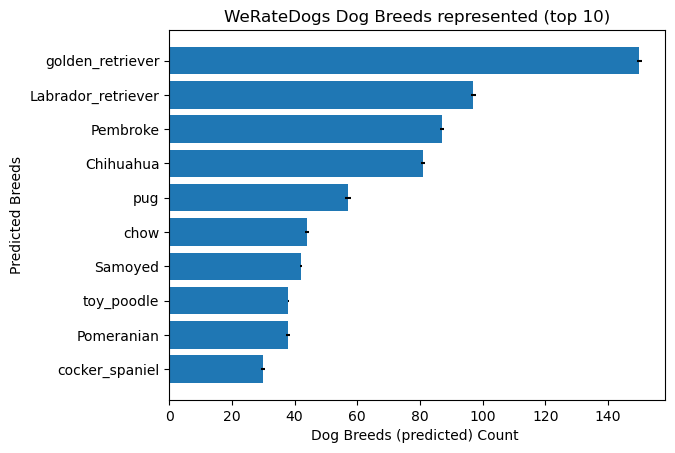

In [74]:
# Horizontal Bar Chart to visualize the top 10 breeds represented during the timeframe

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

names = top10_names.index.values 

y_pos = np.arange(len(names))

performance = top10_names.values
error = np.random.rand(len(names))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Dog Breeds (predicted) Count ')
ax.set_ylabel('Predicted Breeds')
ax.set_title('WeRateDogs Dog Breeds represented (top 10)')

plt.show()

[BACK TO TOP](#top)

In [75]:
# Data Exploration
new_tweets_df2.iloc[300:305,0:10]

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user,in_reply_to_status_id,in_reply_to_user_id,timestamp
300,2017-01-31 17:06:32+00:00,826476773533745153,This is Pilot. He has mastered the synchronize...,"[0, 132]",4111,18170,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-31 17:06:32+00:00
301,2017-01-31 01:27:39+00:00,826240494070030336,We only rate dogs. Please don't send in any mo...,"[0, 114]",2564,13124,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-31 01:27:39+00:00
302,2017-01-30 23:05:46+00:00,826204788643753985,"Here's a little more info on Dew, your favorit...","[0, 116]",908,4820,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-30 23:05:46+00:00
303,2017-01-30 17:10:04+00:00,826115272272650244,This is Ike. He's demonstrating the pupmost re...,"[0, 75]",3047,15452,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-30 17:10:04+00:00
304,2017-01-30 01:21:19+00:00,825876512159186944,This is Mo. No one will push him around in the...,"[0, 106]",1834,10363,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-30 01:21:19+00:00


In [76]:
# Data Exploration
new_tweets_df2.iloc[300:305,11:20]

,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo
300,This is Pilot. He has mastered the synchronize...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/826476773...,12.0,10.0,Pilot,doggo
301,We only rate dogs. Please don't send in any mo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/826240494...,11.0,10.0,NaN,None
302,"Here's a little more info on Dew, your favorit...",NaN,NaN,NaT,http://us.blastingnews.com/news/2017/01/kentuc...,13.0,10.0,NaN,doggo
303,This is Ike. He's demonstrating the pupmost re...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/826115272...,13.0,10.0,Ike,None
304,This is Mo. No one will push him around in the...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/825876512...,11.0,10.0,Mo,None


## <a name="prog1">DATA ANALYSIS</a>

In [77]:
## Percentages that dog was catagorized affectionately
## Averages of doggo, floofer, pupper, & puppo. Essentially, how often have these been designated

## This means that 'doggo' was used to describe a pup 3.6% of the time

desig = ['doggo', 'floofer', 'pupper', 'puppo']

#new_tweets_df2.doggo.mean()

new_tweets_df2[desig].mean()

Series([], dtype: float64)

In [78]:
## Owner named their dog this index the value number of times. There were a lot of missing values here
## Data Exploration 
## Names most used

new_tweets_df2.name.value_counts()

Oliver        10
Cooper        10
Tucker        10
Charlie       10
Penny         10
              ..
Murphy         1
Longfellow     1
Shawwn         1
Rooney         1
Hector         1
Name: name, Length: 911, dtype: int64

[BACK TO TOP](#top)

In [79]:
top10_names_used = list(top10_names.index)

In [80]:
top10_names_used

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'chow',
 'Samoyed',
 'toy_poodle',
 'Pomeranian',
 'cocker_spaniel']

[BACK TO TOP](#top)

### <a name="prog2">More DATA ANALYSIS</a> 

In [81]:
## Create grouping of dataframe on the first predicted name, p1, & obtain the mean of specific data points

# This one provides appropriate columns but it correctly displayed the resulting dataframe in p1 alphabetic order
# which is not statistically significant

name_by_avgs = new_tweets_df2.groupby("p1")[['p1_conf','rating_numerator','rating_denominator','favorite_count',
                                             'retweet_count']].mean()
#Actually, you just need to pull out the rows you want, top10names, from the name_by_avgs. It's just sorted alphabetically
#name_by_avgs = new_tweets_df2.groupby(new_tweets_df2[newtop10])[['p1_conf','rating_numerator','rating_denominator','doggo','floofer',
#                                                 'pupper','puppo','favorite_count','retweet_count']].mean()


name_by_avgs.head(10)

,p1_conf,rating_numerator,rating_denominator,favorite_count,retweet_count
p1,,,,,
Afghan_hound,0.394129,10.500000,10.0,11574.00,6084.250000
African_crocodile,0.330625,10.000000,10.0,864.00,230.000000
African_grey,0.270468,11.000000,10.0,4729.00,1094.000000
African_hunting_dog,0.733025,8.000000,10.0,1542.00,1021.000000
Airedale,0.583771,9.833333,10.0,4716.75,1190.666667
American_Staffordshire_terrier,0.636330,10.833333,10.0,5562.50,1606.500000
American_black_bear,0.219166,8.000000,10.0,4362.00,1120.000000
Angora,0.571526,7.000000,10.0,42585.50,14058.000000
Appenzeller,0.503665,11.000000,10.0,6553.00,1227.500000


In [82]:
# Get the highest average of retweets by predicted names.
p1_retweets = name_by_avgs.retweet_count.sort_values(ascending=False)
p1_retweets.head(10)

# The results indicate that tweets with pictures that are predicted as an "Arabian_camel" had an average retweet count of 17,424
# retweets. This insight says more about the neural network results and it's accuracy than the retweet specifics

p1
Arabian_camel    17424.000000
conch            17304.000000
upright          15837.000000
bubble           14887.500000
prison           14693.666667
gondola          14345.500000
Angora           14058.000000
beaver           13907.000000
laptop           13038.000000
revolver         12633.000000
Name: retweet_count, dtype: float64

In [83]:
# data exploration
#top10stats = name_by_avgs.loc[newtop10]
#top10stats.head(10)

In [84]:
#name_by_avgs.reset_index(inplace=True)

In [85]:
#name_by_avgs.rename(columns= {'p1':'probable_name', 'p1_conf':'probability'}, inplace=True)

In [86]:
# data exploration
#favorites_by_name = name_by_avgs.loc[:,['favorite_count']]
#favorites_by_name. 

In [87]:
#top15_favorites = favorites_by_name.iloc[0:15,:]
#top15_favorites.t.sort_values(ascending=False)

## <a name="vis2">Notable analysis from visual bar chart </a>

### None of the top 15 favorited 'dog's' images were acturately identified as dogs

In [88]:
# create sub
favorites_by_name = name_by_avgs.loc[:,['favorite_count']]
favorites_by_name.sort_values(by=['favorite_count'], ascending=False, inplace=True)
# get top 15 of new subset to create visual from
top15_favorites = favorites_by_name.iloc[0:15,:]
group_names = top15_favorites.index
group_data = top15_favorites.favorite_count

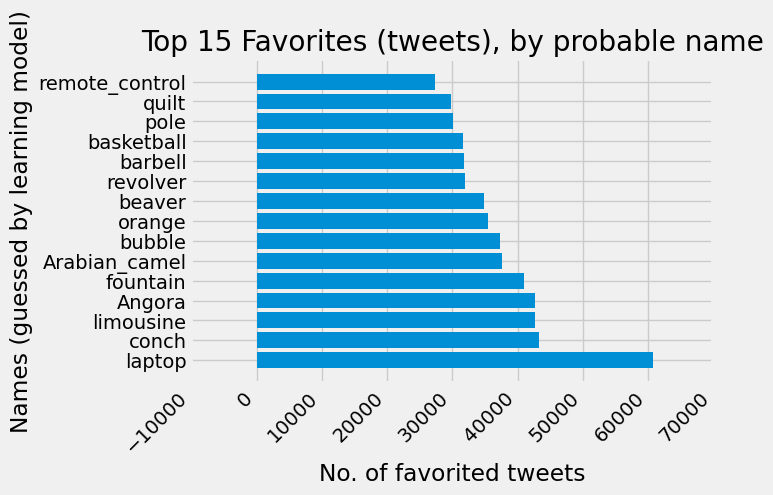

In [89]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 70000], xlabel='No. of favorited tweets', ylabel='Names (guessed by learning model)',
       title='Top 15 Favorites (tweets), by probable name')

plt.show;

[BACK TO TOP](#top)

In [90]:
name_by_avgs.query("rating_numerator >= 10").rating_numerator.sort_values(ascending=False)

p1
bow_tie                        451.500000
microphone                     420.000000
lakeside                       108.000000
soft-coated_wheaten_terrier     25.454545
teddy                           18.111111
                                  ...    
acorn_squash                    10.000000
pencil_box                      10.000000
cougar                          10.000000
skunk                           10.000000
ping-pong_ball                  10.000000
Name: rating_numerator, Length: 244, dtype: float64

In [91]:
name_by_avgs.rating_numerator.sort_values(ascending=False)

p1
bow_tie                        451.500000
microphone                     420.000000
lakeside                       108.000000
soft-coated_wheaten_terrier     25.454545
teddy                           18.111111
                                  ...    
scorpion                         2.000000
slug                             2.000000
electric_fan                     1.000000
lacewing                         1.000000
traffic_light                    0.000000
Name: rating_numerator, Length: 378, dtype: float64